# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline
import json

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [149]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_content = btc_response.content
btc_data = btc_response.json()
#print (json.dumps(btc_data, indent=4))
btc_price = float (btc_data["data"]["1"]["quotes"]["USD"]["price"])
#print (btc_price)

# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_content = eth_response.content
eth_data = eth_response.json()
#print (json.dumps(eth_data, indent=4))
eth_price = float (eth_data["data"]["1027"]["quotes"]["USD"]["price"])
#print (eth_price)

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $64484.40
The current value of your 5.3 ETH is $17344.78


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [12]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

#Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [34]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-05-05", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-05", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1,
).df

# Preview DataFrame
df_ticker.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2020-05-04 00:00:00-04:00  116.89  117.09  116.87  116.975  6950122  280.74   

                                                             
                            high     low   close     volume  
time                                                         
2020-05-04 00:00:00-04:00  283.9  279.13  283.66  140118601

In [78]:
#?df_ticker.index

In [150]:
# Pick AGG and SPY close prices

# df_closing_prices = pd.DataFrame()

# for ticker in tickers:
#     df_closing_prices[ticker] = df_ticker[ticker]["close"]

# df_closing_prices.index = df_closing_prices.index.date
# df_closing_prices.head()

agg_close_price = float (df_ticker["AGG"]["close"][0])
spy_close_price = float (df_ticker["SPY"]["close"][0])

# # Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.975
Current SPY closing price: $283.66


In [104]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price


# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $14183.00
The current value of your 200 AGG shares is $23395.00


### Savings Health Analysis

In [141]:
# Set monthly household income
monthly_income = 12000

# Set total crypto
crypto = my_btc_value + my_agg_value

# Set total shares
shares = my_spy_value + my_agg_value

# Set data
data = [crypto,shares]

# Create savings DataFrame
df_savings = pd.DataFrame(data, columns = ['amount'], index = ['crypto', 'shares'])


# Display savings DataFrame
display(df_savings)

amount
crypto  88315.0
shares  37578.0

<AxesSubplot:title={'center':'Personal Savings Composition'}, ylabel='amount'>

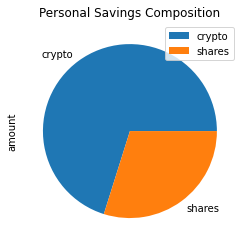

In [153]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title ="Personal Savings Composition")

In [166]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
#print (emergency_fund)

# Calculate total amount of savings
total_savings = crypto + shares
#print (total_savings)

# Set above and below variables
above = total_savings - emergency_fund
below = emergency_fund - total_savings

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money in your fund, you are ${above} above your goal")
elif total_savings == emergency_fund:
    print (f"Congratulations on reaching your goal! You have ${total_savings} in your total savings")
elif total_savings < emergency_fund:
    print (f"Sorry! You still need to save ${below} to reach your goal")
else:
    print (f"Computer says no!")
    

Congratulations! You have enough money in your fund, you are $89893.0 above your goal


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [167]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-05', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-05', tz='America/New_York').isoformat()

In [169]:
# Set the ticker information
tickers = ["SPY", "AGG"]

# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2017-05-12 00:00:00-04:00  108.81  108.9400  108.7800  108.92  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.9400  108.8200  108.89  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.1010  108.8800  109.00  1394153.0   
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.56  2263851.0   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.55  1873534.0   

                              SPY                                        
                             open    high     low    close       volume  
time                                                                     
2017-05-12 00:00:00-04:00     NaN     NaN     NaN      NaN          NaN  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245   42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100   37206183.0  
2017-05-17 00:00:00-04:00  238.10  238.64  235.75  235.850  118613594.0  
2017-05-18 00:00:00-04:00  235.70  237.75  235.43  236.670   82965499.0

In [170]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist_30yrs = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [171]:
# Printing the simulation input data
MC_dist_30yrs.portfolio_data.head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2017-05-12 00:00:00-04:00  108.81  108.9400  108.7800  108.92  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.9400  108.8200  108.89  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.1010  108.8800  109.00  1394153.0   
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.56  2263851.0   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.55  1873534.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-12 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   
2017-05-18 00:00:00-04:00    -0.000091  235.70  237.75  235.43  236.670   

                                                     
                                volume daily_return  
time                                                 
2017-05-12 00:00:00-04:00          NaN          NaN  
2017-05-15 00:00:00-04:00   42230620.0          NaN  
2017-05-16 00:00:00-04:00   37206183.0    -0.000604  
2017-05-17 00:00:00-04:00  118613594.0    -0.017701  
2017-05-18 00:00:00-04:00   82965499.0     0.003477

In [172]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist_30yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1          2          3         4         5         6    \
0      1.000000  1.000000   1.000000   1.000000  1.000000  1.000000  1.000000   
1      0.998942  1.002778   0.999542   1.007152  1.003597  0.988373  1.005356   
2      1.002854  1.004443   1.008110   1.011107  0.996658  0.983602  1.007750   
3      0.998265  1.000535   1.004027   1.015447  1.001144  0.976559  1.007591   
4      1.001425  1.005389   1.004635   1.009367  0.996199  0.977564  1.008433   
...         ...       ...        ...        ...       ...       ...       ...   
7556  23.394888  3.895311  12.535750  14.729039  6.670390  8.572382  5.063619   
7557  23.518792  3.885778  12.488332  14.774167  6.696265  8.634790  5.046102   
7558  23.472319  3.866937  12.557564  14.866636  6.698586  8.593825  5.031582   
7559  23.578078  3.902652  12.519552  14.884716  6.675167  8.498277  5.041623   
7560  23.438720  3.884899  12.488092  14.830880  6.736515  8.546381  5.079705   

           7          8         9    ...       490       491       492  \
0     1.000000   1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.003371   0.994017  0.992444  ...  1.005859  0.991147  1.004806   
2     1.005032   0.985625  0.991974  ...  1.006468  0.988101  1.014756   
3     1.012522   0.994707  0.985083  ...  1.000528  0.992961  1.019566   
4     1.026537   0.995832  0.985271  ...  1.010664  0.997633  1.015537   
...        ...        ...       ...  ...       ...       ...       ...   
7556  4.887332  11.138870  7.947398  ...  3.439200  9.063247  7.728163   
7557  4.889104  11.177751  7.997543  ...  3.440120  8.994568  7.675786   
7558  4.872130  11.413827  8.050967  ...  3.435375  8.939068  7.658200   
7559  4.936920  11.440949  8.011666  ...  3.402918  8.983057  7.655649   
7560  4.949956  11.385437  8.067513  ...  3.432224  8.955494  7.671889   

           493       494       495       496        497       498       499  
0     1.000000  1.000000  1.000000  1.000000   1.000000  1.000000  1.000000  
1     1.004375  0.998174  1.003585  0.993820   1.007368  0.997242  0.996071  
2     0.997719  0.996392  1.005638  0.996504   1.015095  0.998484  0.990365  
3     1.000561  0.998903  1.006516  0.992150   1.018978  1.006913  0.989122  
4     1.003082  1.002580  1.017441  0.988285   1.020311  1.010594  0.989242  
...        ...       ...       ...       ...        ...       ...       ...  
7556  2.549759  3.439595  7.236203  5.423012  14.234627  5.685559  3.334766  
7557  2.569192  3.468378  7.249506  5.376149  14.208168  5.716852  3.306096  
7558  2.592537  3.480940  7.266040  5.379996  14.272554  5.688523  3.304518  
7559  2.613063  3.481508  7.241818  5.358418  14.290104  5.707255  3.305826  
7560  2.618183  3.499884  7.282081  5.340985  14.283844  5.664320  3.308150  

[7561 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

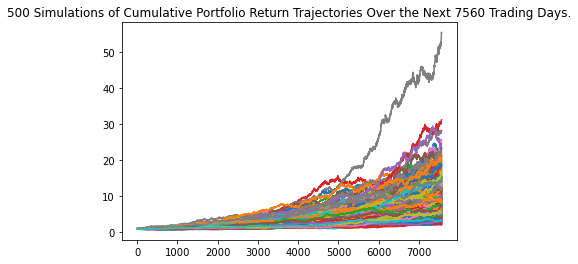

In [173]:
# Plot simulation outcomes
MC_dist_30yrs.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

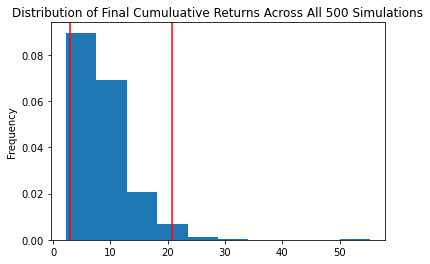

In [174]:
# Plot probability distribution and confidence intervals
MC_dist_30yrs.plot_distribution()

### Retirement Analysis

In [176]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_tbl = MC_dist_30yrs.summarize_cumulative_return()

# Print summary statistics
print (MC_tbl)

count           500.000000
mean              8.837512
std               4.896903
min               2.207269
25%               5.607431
50%               7.807671
75%              10.847768
max              55.346556
95% CI Lower      2.980735
95% CI Upper     20.807461
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [184]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MC_tbl[8]*initial_investment,2)
ci_upper = round(MC_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $59614.71 and $416149.21


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [180]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MC_tbl[8]*initial_investment,2)
ci_upper = round(MC_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $89422.06 and $624223.82


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [188]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Higher risk - 80% stocks, 20% bonds
MC_dist_5yrs = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*5
)

MC_dist_5yrs.portfolio_data.head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2017-05-12 00:00:00-04:00  108.81  108.9400  108.7800  108.92  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.9400  108.8200  108.89  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.1010  108.8800  109.00  1394153.0   
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.56  2263851.0   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.55  1873534.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-12 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   
2017-05-18 00:00:00-04:00    -0.000091  235.70  237.75  235.43  236.670   

                                                     
                                volume daily_return  
time                                                 
2017-05-12 00:00:00-04:00          NaN          NaN  
2017-05-15 00:00:00-04:00   42230620.0          NaN  
2017-05-16 00:00:00-04:00   37206183.0    -0.000604  
2017-05-17 00:00:00-04:00  118613594.0    -0.017701  
2017-05-18 00:00:00-04:00   82965499.0     0.003477

In [189]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_5yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.998802  1.001022  1.003995  1.000715  1.007672  1.001774  1.001016   
2     0.998524  0.997099  0.999609  0.995871  1.008896  1.000519  0.991631   
3     0.997031  0.994363  0.998525  0.996498  1.009220  1.000528  0.991110   
4     0.993359  0.993019  0.994266  0.990083  1.008864  1.002739  0.990168   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.318660  1.100529  1.177459  1.072854  1.292724  1.227646  1.040982   
1257  1.316377  1.100482  1.181820  1.070781  1.289720  1.225595  1.044023   
1258  1.318110  1.099936  1.180627  1.071500  1.283422  1.220316  1.049877   
1259  1.310214  1.107390  1.181875  1.067605  1.284588  1.219470  1.050538   
1260  1.311853  1.109343  1.180466  1.072840  1.286123  1.216842  1.050597   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.003331  1.000836  1.000210  ...  1.003221  1.003571  1.003573   
2     1.004304  0.997089  1.008270  ...  1.003605  1.001963  1.003684   
3     1.002773  0.994409  1.005268  ...  1.004108  1.000971  1.005856   
4     1.003932  0.993599  0.996992  ...  1.003277  1.003017  1.000277   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.312399  0.990301  1.405114  ...  1.513325  1.212181  1.251656   
1257  1.312106  0.990998  1.399250  ...  1.509778  1.215230  1.254118   
1258  1.316453  0.995318  1.404799  ...  1.513838  1.205433  1.261563   
1259  1.319751  0.996680  1.399114  ...  1.514178  1.209468  1.264605   
1260  1.323258  1.000378  1.399573  ...  1.505876  1.210641  1.269286   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.998365  1.002101  1.004250  0.998218  0.996548  0.997050  0.997939  
2     0.997309  1.001038  1.003270  0.995702  1.000980  0.999887  0.999501  
3     0.993051  1.005315  0.998665  0.993104  1.002631  1.000055  1.002256  
4     0.998644  1.003535  1.004590  0.988722  1.007808  1.002604  1.004753  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.302292  1.120091  1.186387  1.369813  1.246508  1.304338  1.257022  
1257  1.302585  1.117544  1.191972  1.366114  1.244229  1.305853  1.249315  
1258  1.310158  1.120880  1.193842  1.364080  1.237925  1.307705  1.250497  
1259  1.310674  1.124647  1.194848  1.364190  1.242280  1.312099  1.255918  
1260  1.300651  1.128993  1.199634  1.364349  1.244341  1.319365  1.256505  

[1261 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

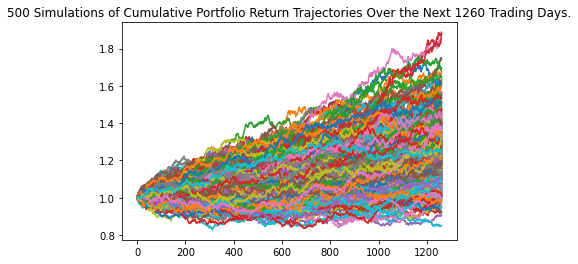

In [190]:
# Plot simulation outcomes
MC_dist_5yrs.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

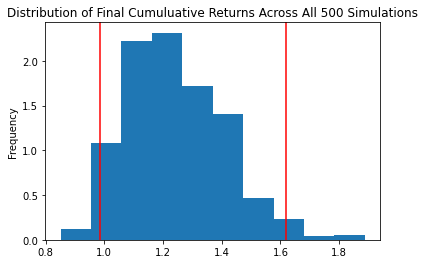

In [191]:
# Plot probability distribution and confidence intervals
MC_dist_5yrs.plot_distribution()

In [192]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_tbl_5yrs = MC_dist_5yrs.summarize_cumulative_return()

# Print summary statistics
print(MC_tbl_5yrs)

count           500.000000
mean              1.242937
std               0.165050
min               0.850644
25%               1.122222
50%               1.227160
75%               1.351072
max               1.887753
95% CI Lower      0.986671
95% CI Upper      1.617528
Name: 1260, dtype: float64


In [202]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(MC_tbl[8]*initial_investment,2)
ci_upper_five = round(MC_tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $178844.13 and $1248447.63


### Ten Years Retirement Option

In [194]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Higher risk - 80% stocks, 20% bonds
MC_dist_10yrs = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_dist_10yrs.portfolio_data.head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2017-05-12 00:00:00-04:00  108.81  108.9400  108.7800  108.92  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.9400  108.8200  108.89  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.1010  108.8800  109.00  1394153.0   
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.56  2263851.0   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.55  1873534.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-12 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   
2017-05-18 00:00:00-04:00    -0.000091  235.70  237.75  235.43  236.670   

                                                     
                                volume daily_return  
time                                                 
2017-05-12 00:00:00-04:00          NaN          NaN  
2017-05-15 00:00:00-04:00   42230620.0          NaN  
2017-05-16 00:00:00-04:00   37206183.0    -0.000604  
2017-05-17 00:00:00-04:00  118613594.0    -0.017701  
2017-05-18 00:00:00-04:00   82965499.0     0.003477

In [195]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_10yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.999076  0.998006  0.995815  0.990604  0.996674  1.009008  0.993687   
2     0.995977  1.000373  0.992670  0.988938  0.999136  1.011323  0.998474   
3     0.997628  1.000630  0.990994  0.986378  0.998355  1.011217  1.001453   
4     0.995452  0.996679  0.994973  0.981033  1.001181  1.010375  1.003888   
...        ...       ...       ...       ...       ...       ...       ...   
2516  1.479952  1.744609  1.351341  1.007124  1.689790  1.525854  1.502472   
2517  1.476028  1.750745  1.356145  1.003978  1.690548  1.518140  1.497663   
2518  1.476116  1.745965  1.361527  1.007102  1.695636  1.513678  1.495292   
2519  1.476123  1.754937  1.357824  1.008905  1.699313  1.521408  1.499003   
2520  1.484716  1.762124  1.365815  1.005994  1.703242  1.530335  1.500989   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.999009  1.000344  1.006643  ...  1.003593  1.002580  0.998250   
2     1.003940  1.002221  1.003757  ...  1.005605  0.991819  0.999851   
3     1.001217  1.006757  1.008118  ...  1.004515  0.981427  1.001247   
4     1.001866  1.011273  1.010459  ...  1.001243  0.984646  1.004252   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.450565  1.305148  1.783760  ...  1.593851  1.180281  2.095086   
2517  1.452048  1.306161  1.779555  ...  1.599120  1.181360  2.101672   
2518  1.446667  1.307830  1.766850  ...  1.610955  1.182381  2.102590   
2519  1.440953  1.311524  1.769792  ...  1.607570  1.179662  2.098635   
2520  1.439091  1.315757  1.759742  ...  1.609138  1.181063  2.096543   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.000279  1.007050  1.001761  1.003072  1.002049  0.997467  1.001699  
2     1.007255  1.009658  1.000429  1.006569  0.999839  0.990326  1.008969  
3     1.008449  1.002890  0.998819  1.009314  0.997259  0.984678  1.016687  
4     1.003880  0.999297  1.007701  1.007682  0.994990  0.986211  1.020553  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.225251  2.520788  2.029703  1.731823  1.567787  1.546816  1.431383  
2517  1.228781  2.518065  2.033079  1.729546  1.575719  1.538972  1.423857  
2518  1.224624  2.533721  2.030979  1.726271  1.575044  1.536197  1.428541  
2519  1.228227  2.552261  2.033592  1.725110  1.572667  1.544126  1.422361  
2520  1.232153  2.546792  2.032004  1.730326  1.570383  1.538869  1.417700  

[2521 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

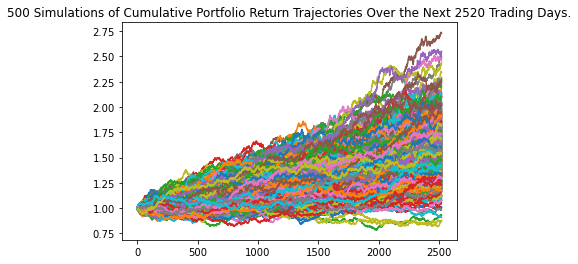

In [196]:
# Plot simulation outcomes
MC_dist_10yrs.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

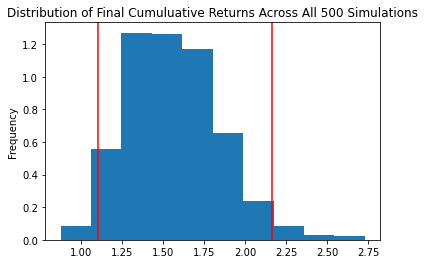

In [197]:
# Plot probability distribution and confidence intervals
MC_dist_10yrs.plot_distribution()

In [199]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_tbl_10yrs = MC_dist_10yrs.summarize_cumulative_return()
# Print summary statistics
print (MC_tbl_10yrs)

count           500.000000
mean              1.567139
std               0.280316
min               0.874090
25%               1.368675
50%               1.539679
75%               1.729427
max               2.730475
95% CI Lower      1.105459
95% CI Upper      2.162559
Name: 2520, dtype: float64


In [201]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(MC_tbl[8]*initial_investment,2)
ci_upper_ten = round(MC_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $178844.13 and $1248447.63
